### Linear Regression

In [4]:
# import packages
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) Prepare Data
# 1) model
# 2) loss and optimizer
# 3) training loop

### preparing data

In [17]:
X_numpy, y_numpy = datasets.make_regression(n_samples = 100, 
                                            n_features = 1, 
                                            noise = 20, 
                                            random_state=1)
# converting to tensors
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

# reshape
X = X.reshape(-1,1)
y = y.reshape(-1,1)

# getting number of samples and number of features
n_sampes, n_features = X.shape

### model

In [18]:
input_size = n_features
output_size = 1

# defining our linear model with input and output size
model = nn.Linear(input_size, output_size)

### loss and optimizer

In [19]:
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

### Training Loop

epoch: 10, loss = 4408.2383
epoch: 20, loss = 3286.8516
epoch: 30, loss = 2476.0037
epoch: 40, loss = 1889.0457
epoch: 50, loss = 1463.7175
epoch: 60, loss = 1155.2172
epoch: 70, loss = 931.2564
epoch: 80, loss = 768.5360
epoch: 90, loss = 650.2216
epoch: 100, loss = 564.1353


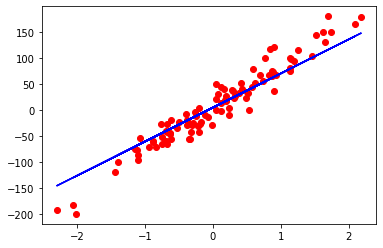

In [20]:
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # backward pass
    loss.backward()
    
    #update
    optimizer.step()
    
    # remove gradient accumulation
    optimizer.zero_grad()
    
    if (epoch + 1)%10 == 0:
        print(f'epoch: {epoch + 1}, loss = {loss.item():.4f}')

# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()